In [1]:
## importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("HousingPrice.csv")
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [3]:
df.shape

(33656, 19)

In [4]:
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

ADDRESS : Physical address of the property ( we will set to index )
SUBURB : Specific locality in Perth; a list of all Perth suburb can be found here
PRICE : Price at which a property was sold (AUD)
BEDROOMS : Number of bedrooms
BATHROOMS : Number of bathrooms
GARAGE : Number of garage places
LAND_AREA : Total land area (m^2)
FLOOR_AREA : Internal floor area (m^2)
BUILD_YEAR : Year in which the property was built
CBD_DIST : Distance from the centre of Perth (m)
NEAREST_STN : The nearest public transport station from the property
NEAREST_STN_DIST : The nearest station distance (m)
DATE_SOLD : Month & year in which the property was sold
POSTCODE : Local Area Identifier
LATITUDE : Geographic Location (lat) of ADDRESS
LONGITIDE : Geographic Location (long) of ADDRESS
NEAREST_SCH : Location of the nearest School
NEAREST_SCH_DIST : Distance to the nearest school
NEAREST_SCH_RANK : Ranking of the nearest school


In [6]:
df.nunique()

ADDRESS             33566
SUBURB                321
PRICE                2297
BEDROOMS               10
BATHROOMS               8
GARAGE                 25
LAND_AREA            4372
FLOOR_AREA            528
BUILD_YEAR            124
CBD_DIST              595
NEAREST_STN            68
NEAREST_STN_DIST     1189
DATE_SOLD             350
POSTCODE              114
LATITUDE            29707
LONGITUDE           28557
NEAREST_SCH           160
NEAREST_SCH_DIST    33318
NEAREST_SCH_RANK      103
dtype: int64

In [7]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [8]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

<AxesSubplot:>

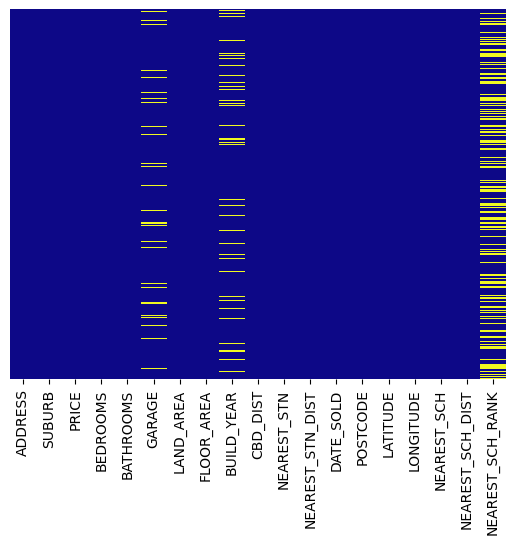

In [9]:
# check for missing value using visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [10]:
###  % of null values
df.isna().sum()/len(df)

ADDRESS             0.000000
SUBURB              0.000000
PRICE               0.000000
BEDROOMS            0.000000
BATHROOMS           0.000000
GARAGE              0.073627
LAND_AREA           0.000000
FLOOR_AREA          0.000000
BUILD_YEAR          0.093743
CBD_DIST            0.000000
NEAREST_STN         0.000000
NEAREST_STN_DIST    0.000000
DATE_SOLD           0.000000
POSTCODE            0.000000
LATITUDE            0.000000
LONGITUDE           0.000000
NEAREST_SCH         0.000000
NEAREST_SCH_DIST    0.000000
NEAREST_SCH_RANK    0.325410
dtype: float64

In [11]:
# lets check the correlation among the variables

<AxesSubplot:>

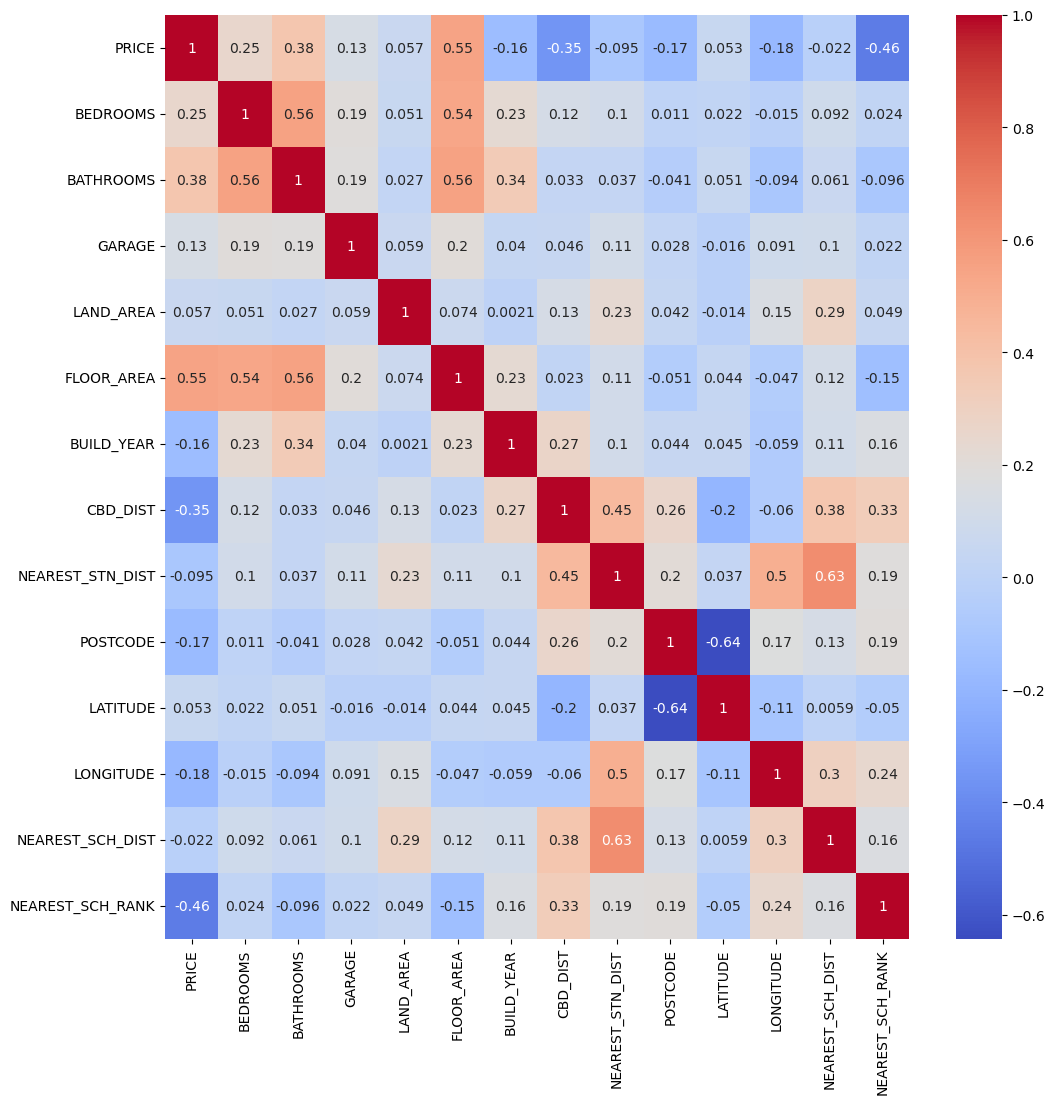

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [13]:
# handling missing values

In [14]:
# GARAGE columns

In [15]:
df['GARAGE'].fillna(0, inplace=True)

In [16]:
df["GARAGE"].isnull().sum()

0

In [17]:
# BUILD  YEAR column

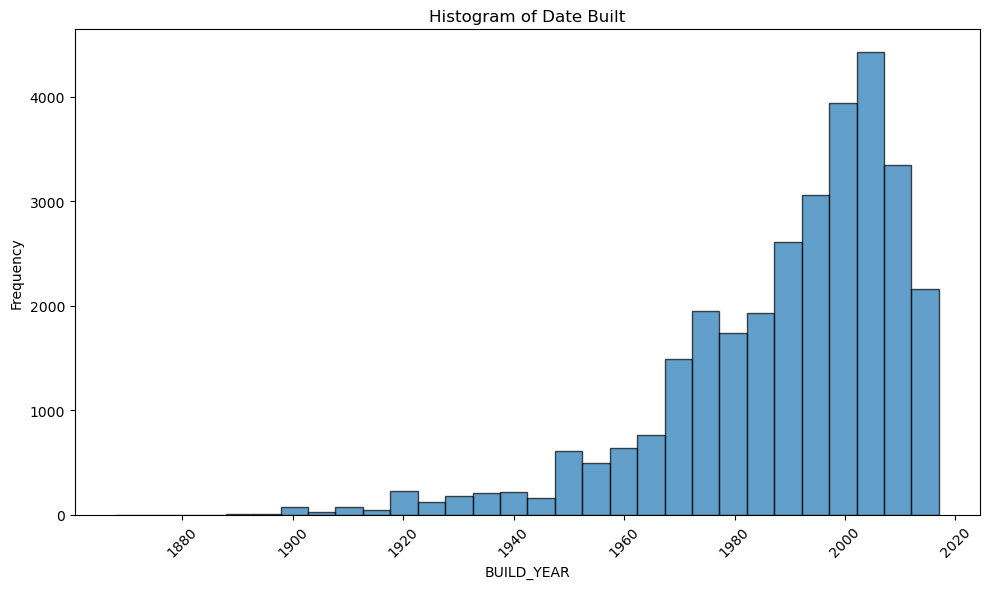

In [18]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Convert the 'Date_Built' column to datetime format
# df['BUILD_YEAR'] = pd.to_datetime(df['BUILD_YEAR'])

# Plotting the histogram
plt.hist(df['BUILD_YEAR'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('BUILD_YEAR')
plt.ylabel('Frequency')
plt.title('Histogram of Date Built')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [19]:
# ###
### fill missing values with mode
###


In [20]:
# df['BUILD_YEAR'] = pd.to_datetime(df['BUILD_YEAR'])

In [21]:
# Calculate the mode of the 'Build_Year' column
mode_build_year = df['BUILD_YEAR'].mode()[0]


In [22]:
# Impute missing values with the mode value
df['BUILD_YEAR'] = df['BUILD_YEAR'].fillna(mode_build_year)
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [23]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE                  0
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR              0
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [24]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [25]:
# lets make a scatter plot

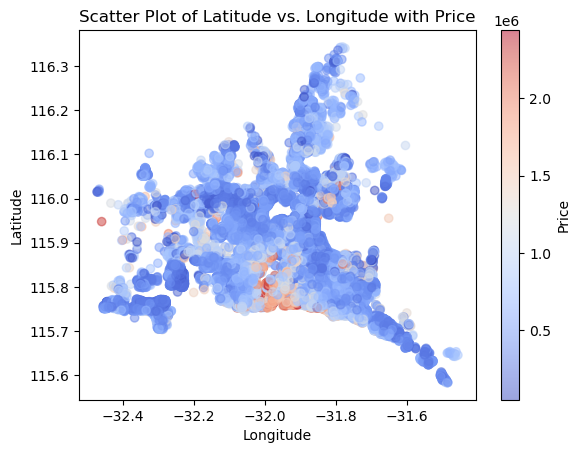

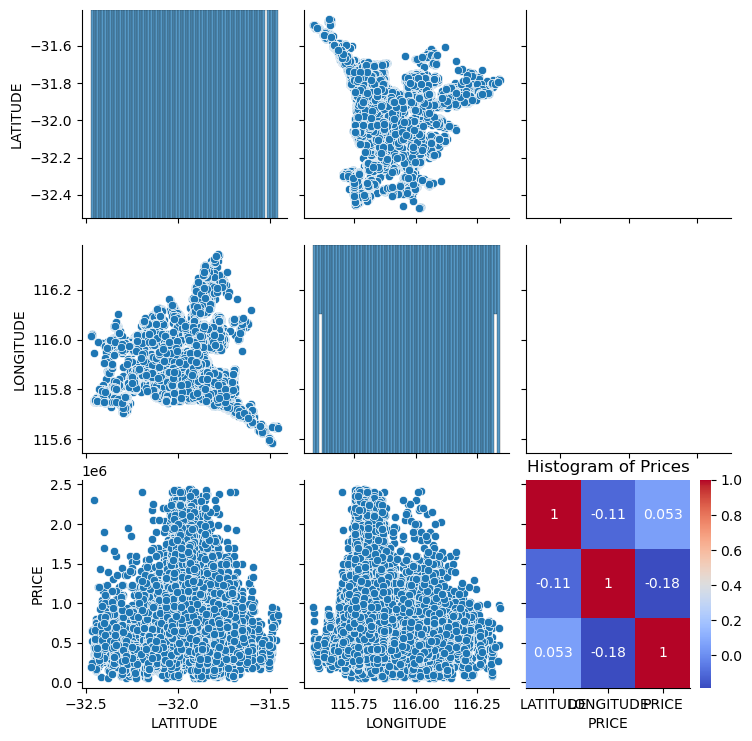

In [26]:
# Scatter plot of latitude vs. longitude with color-mapped prices
plt.scatter(df.LATITUDE, df.LONGITUDE, c=df.PRICE , cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs. Longitude with Price')

# Pair plot to visualize relationships between variables
sns.pairplot(df , vars=["LATITUDE","LONGITUDE","PRICE"])

# Correlation heatmap
correlation_matrix = df[["LATITUDE","LONGITUDE","PRICE"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Histogram of prices
plt.hist(df['PRICE'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')

plt.show()


array([[<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'BATHROOMS'}>,
        <AxesSubplot:title={'center':'GARAGE'}>],
       [<AxesSubplot:title={'center':'LAND_AREA'}>,
        <AxesSubplot:title={'center':'FLOOR_AREA'}>,
        <AxesSubplot:title={'center':'BUILD_YEAR'}>,
        <AxesSubplot:title={'center':'CBD_DIST'}>],
       [<AxesSubplot:title={'center':'NEAREST_STN_DIST'}>,
        <AxesSubplot:title={'center':'POSTCODE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>],
       [<AxesSubplot:title={'center':'NEAREST_SCH_DIST'}>,
        <AxesSubplot:title={'center':'NEAREST_SCH_RANK'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

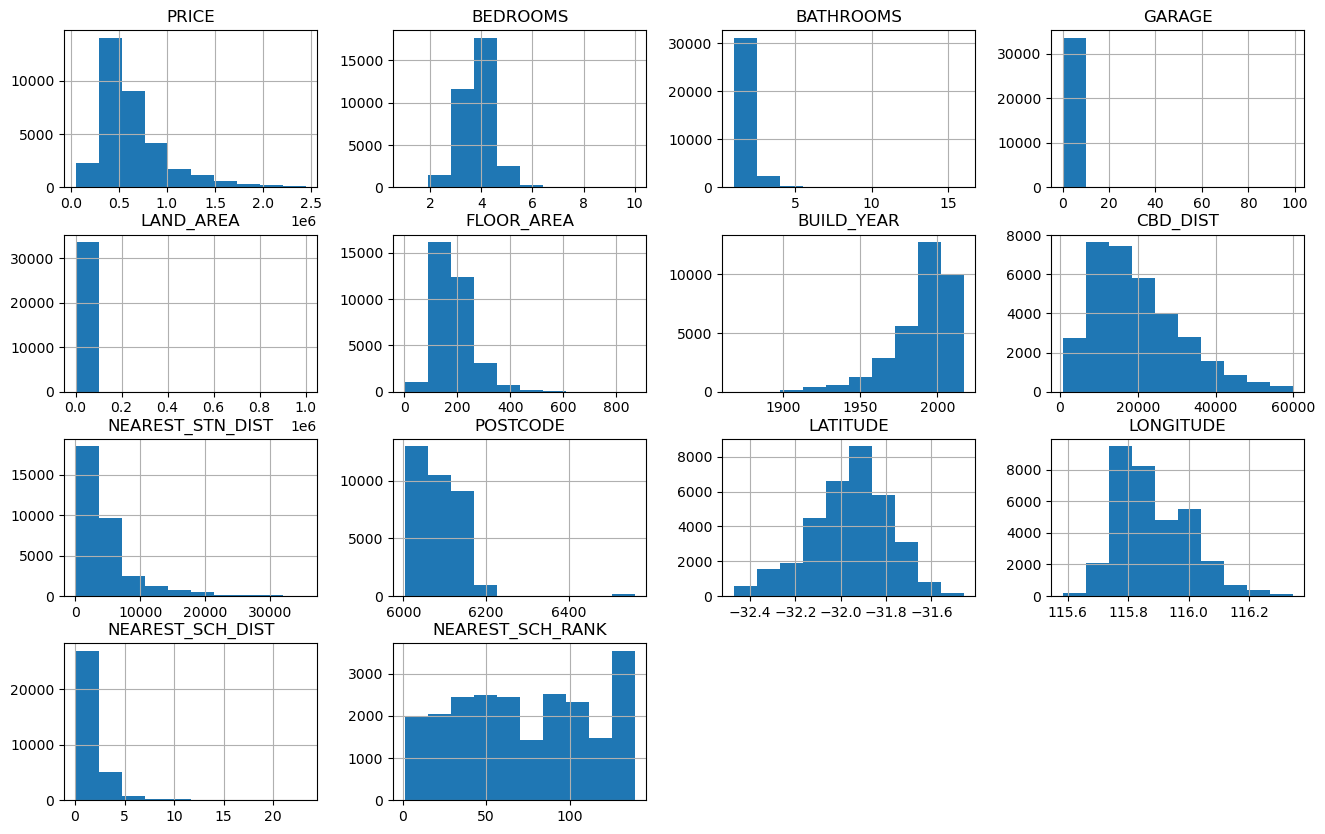

In [27]:
df.hist(figsize=(16,10))

In [28]:
# check for outliers

<Figure size 1600x1000 with 0 Axes>

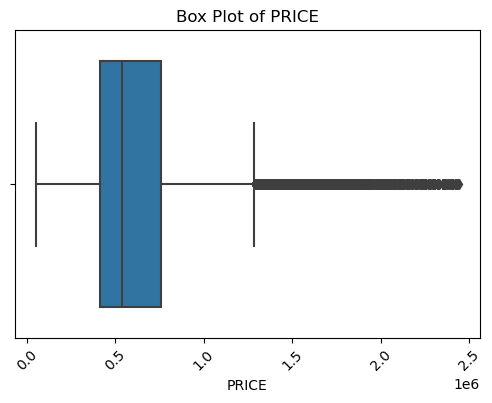

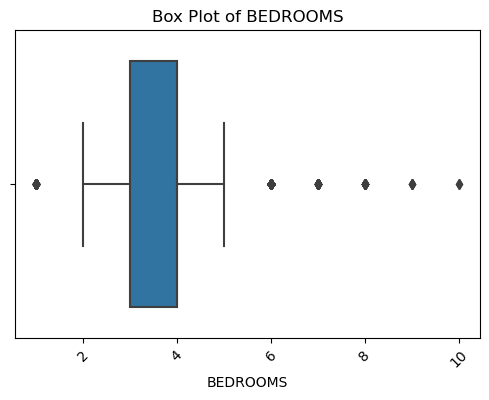

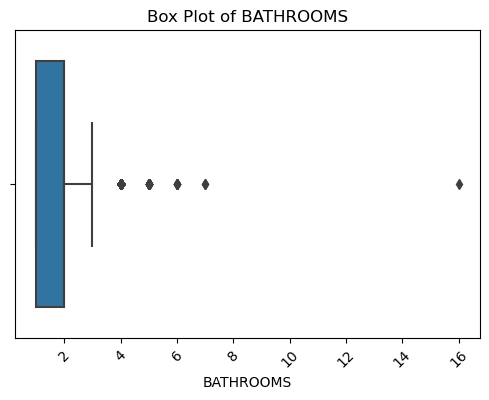

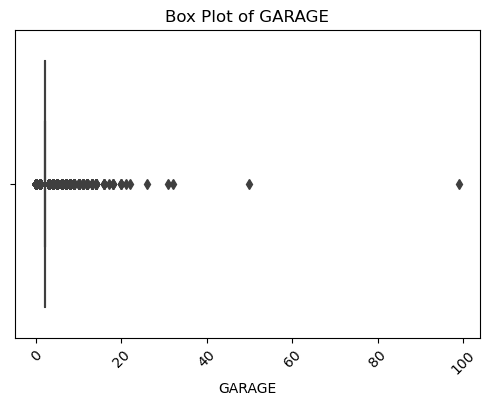

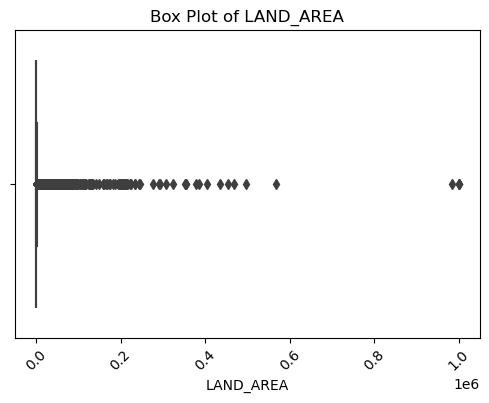

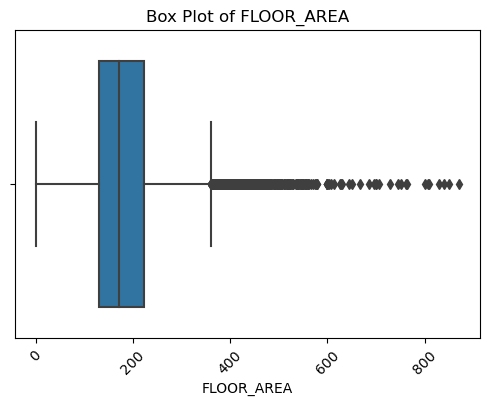

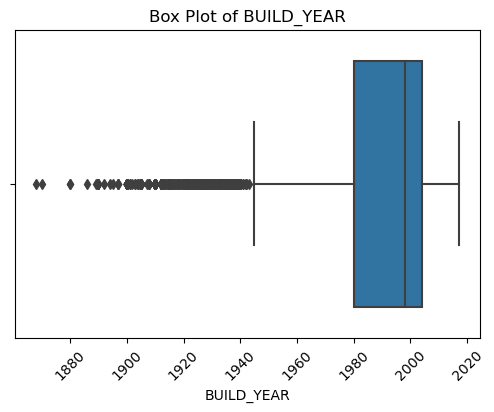

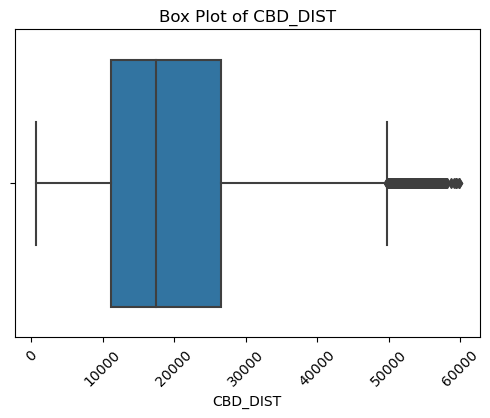

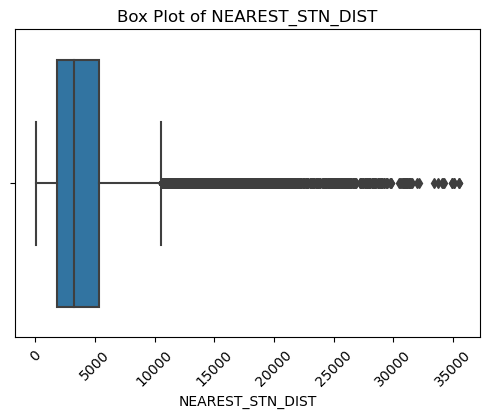

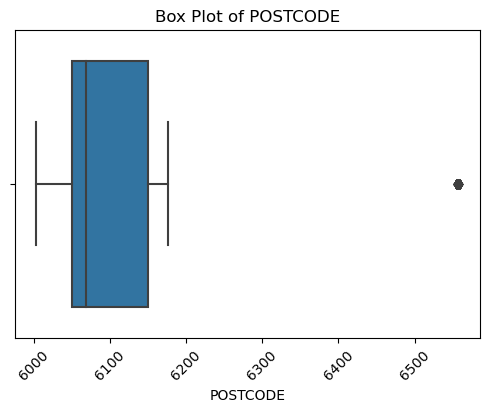

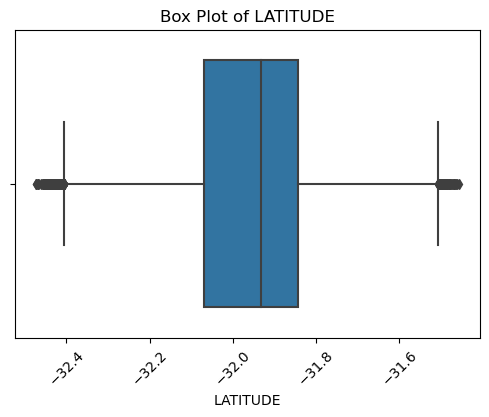

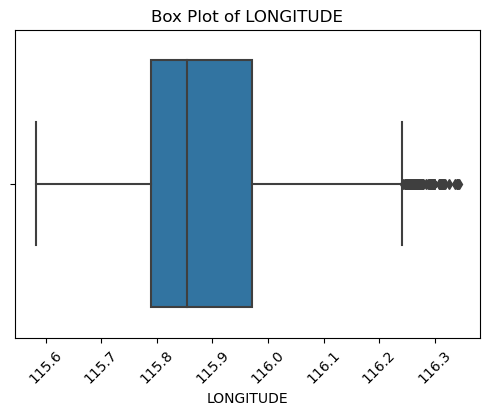

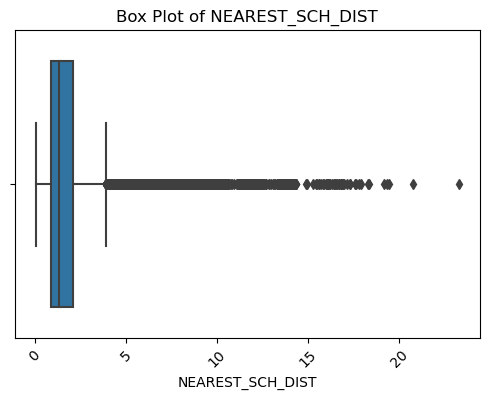

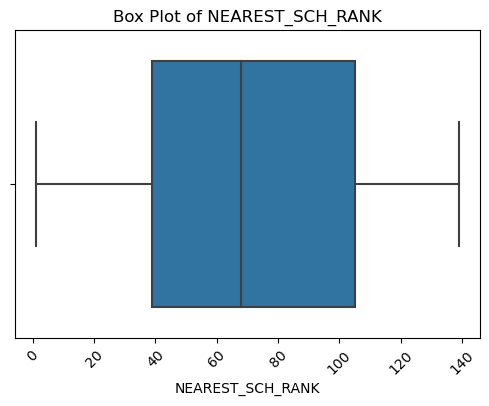

In [29]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(16, 10))

for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))  # Adjust the subplot size as needed
    sns.boxplot(x=column, data=df)
    plt.title(f"Box Plot of {column}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

In [30]:
# drop the non relevant columns

In [31]:
df = df.drop(columns=["ADDRESS","NEAREST_STN","POSTCODE","NEAREST_SCH","NEAREST_SCH_RANK"])

In [32]:
df.shape

(33656, 14)

In [33]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,South Lake,565000,4,2,2.0,600,160,2003.0,18300,1800,09-2018\r,-32.115900,115.842450,0.828339
1,Wandi,365000,3,2,2.0,351,139,2013.0,26900,4900,02-2019\r,-32.193470,115.859554,5.524324
2,Camillo,287000,3,1,1.0,719,86,1979.0,22600,1900,06-2015\r,-32.120578,115.993579,1.649178
3,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,3600,07-2018\r,-31.900547,116.038009,1.571401
4,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,2000,11-2016\r,-31.885790,115.947780,1.514922


In [34]:
df.isnull().sum()

SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
DATE_SOLD           0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH_DIST    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  object 
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            33656 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   BUILD_YEAR        33656 non-null  float64
 8   CBD_DIST          33656 non-null  int64  
 9   NEAREST_STN_DIST  33656 non-null  int64  
 10  DATE_SOLD         33656 non-null  object 
 11  LATITUDE          33656 non-null  float64
 12  LONGITUDE         33656 non-null  float64
 13  NEAREST_SCH_DIST  33656 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 3.6+ MB


In [36]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["SUBURB"]=le.fit_transform(df["SUBURB"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  int32  
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            33656 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   BUILD_YEAR        33656 non-null  float64
 8   CBD_DIST          33656 non-null  int64  
 9   NEAREST_STN_DIST  33656 non-null  int64  
 10  DATE_SOLD         33656 non-null  object 
 11  LATITUDE          33656 non-null  float64
 12  LONGITUDE         33656 non-null  float64
 13  NEAREST_SCH_DIST  33656 non-null  float64
dtypes: float64(5), int32(1), int64(7), object(1)
memory usage: 3.5+ MB


In [38]:
df['DATE_SOLD'] = pd.to_datetime(df['DATE_SOLD'])

# Extract the year component and create a new 'Year_Sold' column
df['DATE_SOLD'] = df['DATE_SOLD'].dt.year

# Convert 'Year_Sold' column to int64
df['DATE_SOLD'] = df['DATE_SOLD'].astype('int64')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  int32  
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            33656 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   BUILD_YEAR        33656 non-null  float64
 8   CBD_DIST          33656 non-null  int64  
 9   NEAREST_STN_DIST  33656 non-null  int64  
 10  DATE_SOLD         33656 non-null  int64  
 11  LATITUDE          33656 non-null  float64
 12  LONGITUDE         33656 non-null  float64
 13  NEAREST_SCH_DIST  33656 non-null  float64
dtypes: float64(5), int32(1), int64(8)
memory usage: 3.5 MB


In [40]:
df['SUBURB'] = df['SUBURB'].astype('int64')


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  int64  
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            33656 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   BUILD_YEAR        33656 non-null  float64
 8   CBD_DIST          33656 non-null  int64  
 9   NEAREST_STN_DIST  33656 non-null  int64  
 10  DATE_SOLD         33656 non-null  int64  
 11  LATITUDE          33656 non-null  float64
 12  LONGITUDE         33656 non-null  float64
 13  NEAREST_SCH_DIST  33656 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 3.6 MB


In [42]:
df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,266,565000,4,2,2.0,600,160,2003.0,18300,1800,2018,-32.115900,115.842450,0.828339
1,290,365000,3,2,2.0,351,139,2013.0,26900,4900,2019,-32.193470,115.859554,5.524324
2,53,287000,3,1,1.0,719,86,1979.0,22600,1900,2015,-32.120578,115.993579,1.649178
3,32,255000,2,1,2.0,651,59,1953.0,17900,3600,2018,-31.900547,116.038009,1.571401
4,175,325000,4,1,2.0,466,131,1998.0,11200,2000,2016,-31.885790,115.947780,1.514922


In [43]:
## Normalize 

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
df_num=df.columns

In [46]:
df_num

Index(['SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'DATE_SOLD',
       'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST'],
      dtype='object')

In [47]:
df[df_num]=scaler.fit_transform(df[df_num])

In [48]:
df[df_num].describe()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
count,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04,3.365600e+04
mean,5.090941e-17,8.711965e-17,-1.073277e-16,-3.568970e-16,1.852183e-16,5.624265e-17,1.481463e-16,2.719458e-15,-7.281798e-17,-1.601207e-17,-1.933863e-14,-1.509951e-14,1.083020e-13,-8.959041e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.704091e+00,-1.647101e+00,-3.535924e+00,-1.401153e+00,-1.421059e+00,-1.605225e-01,-2.531161e+00,-6.078418e+00,-1.680391e+00,-9.960788e-01,-8.164778e+00,-2.881785e+00,-2.510137e+00,-9.990732e-01
25%,-8.704351e-01,-6.381648e-01,-8.764444e-01,-1.401153e+00,-2.645748e-02,-1.340447e-01,-7.420267e-01,-5.287714e-01,-7.547684e-01,-6.058672e-01,-4.624314e-01,-6.062293e-01,-7.576209e-01,-5.353459e-01
50%,-2.580960e-02,-2.854587e-01,4.532952e-01,3.012118e-01,-2.645748e-02,-1.233218e-01,-1.595179e-01,3.631361e-01,-2.003982e-01,-2.944099e-01,1.081128e-01,1.543092e-01,-2.121885e-01,-2.690460e-01
75%,8.956001e-01,3.454777e-01,4.532952e-01,3.012118e-01,-2.645748e-02,-1.139767e-01,5.374123e-01,6.604386e-01,6.003588e-01,1.727762e-01,6.786571e-01,6.572613e-01,7.741792e-01,1.614901e-01
max,1.806041e+00,5.066961e+00,8.431733e+00,2.413432e+01,6.761170e+01,5.974016e+01,9.521224e+00,1.304594e+00,3.521802e+00,6.891357e+00,9.639292e-01,2.830593e+00,3.927176e+00,1.227917e+01


In [49]:
df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,1.213706,-0.202552,0.453295,0.301212,-0.026457,-0.128234,-0.325949,0.610888,-0.130002,-0.605867,0.393385,-0.873207,-0.311632,-0.565260
1,1.476966,-0.764633,-0.876444,0.301212,-0.026457,-0.143150,-0.617203,1.106392,0.626757,0.083788,0.678657,-1.309542,-0.166853,2.124348
2,-1.122726,-0.983845,-0.876444,-1.401153,-0.723758,-0.121105,-1.352274,-0.578322,0.248378,-0.583620,-0.462431,-0.899522,0.967660,-0.095127
3,-1.353078,-1.073778,-2.206184,-1.401153,-0.026457,-0.125179,-1.726744,-1.866633,-0.165200,-0.205422,0.393385,0.338161,1.343754,-0.139674
4,0.215512,-0.877049,0.453295,-1.401153,-0.026457,-0.136261,-0.728157,0.363136,-0.754768,-0.561373,-0.177159,0.421168,0.579976,-0.172022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,1.191767,1.132392,0.453295,2.003577,-0.026457,-0.146685,0.852938,1.106392,-0.323592,-0.672608,-0.177159,-0.584531,-1.078807,-0.220460
33652,1.652472,-0.638165,-0.876444,0.301212,-0.026457,-0.150518,-0.963935,0.462237,-0.895561,0.017048,0.108113,0.526550,-0.320494,-0.077678
33653,1.652472,-0.590388,-0.876444,0.301212,-0.026457,-0.148542,-0.991673,0.462237,-0.895561,0.017048,0.108113,0.527480,-0.320370,-0.083683
33654,-0.541360,-0.961362,-0.876444,-1.401153,-0.026457,-0.136800,-1.366143,-0.826074,-0.631575,-0.027446,-0.177159,0.680538,-0.311971,-0.834361


In [50]:
##

In [51]:
import statsmodels 

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
X = df.drop('PRICE', axis = 1)
y = df.PRICE

In [54]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
(vif_data)

,feature,VIF
0,SUBURB,1.024259
1,BEDROOMS,1.671462
2,BATHROOMS,1.813801
3,GARAGE,1.069017
4,LAND_AREA,1.112520
5,FLOOR_AREA,1.694663
6,BUILD_YEAR,1.226284
7,CBD_DIST,1.788311
8,NEAREST_STN_DIST,2.640942
9,DATE_SOLD,1.156302


In [55]:
vif_data[vif_data.VIF == max(vif_data.VIF)]['feature']

8    NEAREST_STN_DIST
Name: feature, dtype: object

In [56]:
def remove_multicollinearity(data):
    check = 0
    while(check == 0):
        vif_data = pd.DataFrame()
        vif_data["feature"] = data.columns
  
        # calculating VIF for each feature
        vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
        
        if(max(vif_data.VIF) >= 5):
            col = vif_data[vif_data.VIF == max(vif_data.VIF)]['feature']
            data.drop(col , axis = 1, inplace = True)
        else:
            print('There is no more multicollinearity')
            check = 1
    return data

In [57]:
new_df = remove_multicollinearity(X)

There is no more multicollinearity


In [58]:
from sklearn.decomposition import PCA

In [59]:
pca1=PCA(n_components=11)
pca_fit = pca1.fit_transform(new_df)
pca1.explained_variance_ratio_

array([0.20434027, 0.16761347, 0.09876419, 0.08408751, 0.07442843,
       0.07196   , 0.06817562, 0.05721297, 0.05544401, 0.03863618,
       0.03243199])

In [60]:
sum(pca1.explained_variance_ratio_)   # percentage explained by pca

0.9530946396409178

In [61]:
pca_fit = pd.DataFrame(pca_fit)

In [62]:
pca_fit

,0,1,2,3,4,5,6,7,8,9,10
0,-0.379897,-0.825488,-0.881268,1.116496,-0.284147,-0.084429,-0.137966,0.113440,0.833076,0.298178,0.361341
1,0.809587,0.822894,-2.144987,0.617437,-0.219673,0.467274,-0.204628,-0.058312,0.892190,-1.553991,1.137597
2,-1.433675,2.008600,0.040401,0.007711,1.309235,-0.815325,-0.283533,-0.034950,-0.123738,0.361319,0.035233
3,-2.276536,2.660802,0.868938,-0.732908,1.172666,0.793344,0.243266,-0.569728,-0.288874,-0.037470,0.083665
4,-0.876786,0.497566,0.488686,-0.135192,-0.147231,0.221014,-0.370954,0.372175,0.576706,0.777502,-0.299260
...,...,...,...,...,...,...,...,...,...,...,...
33651,0.654948,-2.239071,-0.582376,0.921367,-0.759317,-0.638416,-0.186754,0.572190,0.608594,-0.763992,0.836701
33652,-0.836677,0.112617,-0.298200,0.136489,-1.366583,0.801244,-0.247023,0.558862,1.070356,-0.397442,0.863601
33653,-0.848122,0.121434,-0.302493,0.133711,-1.363339,0.804739,-0.245262,0.563280,1.075357,-0.382516,0.879698
33654,-2.052346,1.119955,0.498078,-0.646971,0.098324,0.424634,0.270459,0.374352,-0.360553,0.525103,-0.149442


In [64]:
#new = 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [66]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size=0.2, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.4601189157997795


In [68]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

# Calculate MAE
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error: {mae}")


Root Mean Squared Error: 0.6783206585382605
R-squared: 0.5557930599544345
Mean Absolute Error: 0.45662516322389235


In [69]:
## the decison tree regressor 

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
model = DecisionTreeRegressor(max_depth=9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

R-squared score: 0.74
